In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib_venn import venn3 
from upsetplot import UpSet
from pandas import DataFrame

In [3]:
# Load the file with 9 Columns
data = pd.read_excel(r"C:\Users\ronit\OneDrive\Desktop\Temporary\Analysis\combined_trimmed.xlsx")
data.head()

,Brand,Phase,Website,HAR File Present,IAS Domains R&R,DoubleVerify Domains R&R,Moat Domains R&R,Human Security Domains R&R,Pixalate Domains R&R
0,abbott laboratories,Treatment,9tl.ru,1,0,0,0,0,0
1,abbott laboratories,Treatment,actualidadpanamericana.com,1,0,0,0,0,0
2,abbott laboratories,Treatment,alternet.org,0,0,0,0,0,0
3,abbott laboratories,Treatment,ancient-code.com,1,0,0,0,0,0
4,abbott laboratories,Treatment,apnews.com,1,0,0,0,0,0


In [4]:
# Check if 'Brands' column exists
if 'Brand' in data.columns:
    # Count unique entries in the 'Brands' column
    unique_brands_count = data['Brand'].nunique()
    print(f'The number of unique entries in the "Brands" column is: {unique_brands_count}')
else:
    print('The "Brands" column does not exist in the provided Excel sheet.')

The number of unique entries in the "Brands" column is: 100


In [5]:
# Load the combined file
untrim_data = pd.read_excel(r"C:\Users\ronit\OneDrive\Desktop\Temporary\Analysis\combined.xlsx")
untrim_data.head()

,Brand,Phase,Website,HAR File Present,IAS Domains R&R,DoubleVerify Domains R&R,Moat Domains R&R,Human Security Domains R&R,Pixalate Domains R&R,adsafeprotected.com,...,pxi.pub,pxltgr.com,script.ac,srvmath.com,tagsrvcs.com,tpctrust.com,tworismo.com,whiteops.com,adrta.com,pixalate.com
0,abbott laboratories,Treatment,9tl.ru,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,abbott laboratories,Treatment,actualidadpanamericana.com,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,abbott laboratories,Treatment,alternet.org,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,abbott laboratories,Treatment,ancient-code.com,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,abbott laboratories,Treatment,apnews.com,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Rename the column
data = data.rename(columns={"IAS Domains R&R": "IAS"})
data = data.rename(columns={"DoubleVerify Domains R&R": "DoubleVerify"})
data = data.rename(columns={"Moat Domains R&R": "Moat"})
data = data.rename(columns={"Human Security Domains R&R": "Human Security"})
data = data.rename(columns={"Pixalate Domains R&R": "Pixalate"})
# Replace 'Controlled' with 'Control' in the 'Phase' column
data['Phase'] = data['Phase'].replace('Controlled', 'Control')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12400 entries, 0 to 12399
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Brand             12400 non-null  object
 1   Phase             12400 non-null  object
 2   Website           12400 non-null  object
 3   HAR File Present  12400 non-null  int64 
 4   IAS               12400 non-null  int64 
 5   DoubleVerify      12400 non-null  int64 
 6   Moat              12400 non-null  int64 
 7   Human Security    12400 non-null  int64 
 8   Pixalate          12400 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 872.0+ KB


In [7]:
# Rename the column
untrim_data = untrim_data.rename(columns={"IAS Domains R&R": "IAS"})
untrim_data = untrim_data.rename(columns={"DoubleVerify Domains R&R": "DoubleVerify"})
untrim_data = untrim_data.rename(columns={"Moat Domains R&R": "Moat"})
untrim_data = untrim_data.rename(columns={"Human Security Domains R&R": "Human Security"})
untrim_data = untrim_data.rename(columns={"Pixalate Domains R&R": "Pixalate"})
# Replace 'Controlled' with 'Control' in the 'Phase' column
untrim_data['Phase'] = untrim_data['Phase'].replace('Controlled', 'Control')

# Display the structure of the data
untrim_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12400 entries, 0 to 12399
Data columns (total 57 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Brand                12400 non-null  object
 1   Phase                12400 non-null  object
 2   Website              12400 non-null  object
 3   HAR File Present     12400 non-null  int64 
 4   IAS                  12400 non-null  int64 
 5   DoubleVerify         12400 non-null  int64 
 6   Moat                 12400 non-null  int64 
 7   Human Security       12400 non-null  int64 
 8   Pixalate             12400 non-null  int64 
 9   adsafeprotected.com  12400 non-null  int64 
 10  getpublica.com       12400 non-null  int64 
 11  iasds01.com          12400 non-null  int64 
 12  publica-ctv.com      12400 non-null  int64 
 13  publica-project.com  12400 non-null  int64 
 14  publica-stream.com   12400 non-null  int64 
 15  besafe.global        12400 non-null  int64 
 16  doub

In [8]:
Domain = ['IAS','DoubleVerify','Moat','Human Security','Pixalate']
colour_Domain = ['skyblue', 'orange','yellow', 'green', 'purple']

Phase = ['Controlled','Treatment']
Phase_colour = ['red','lime']

Total_Websites = 62
Brands_Count = 98
phase_crawl = Total_Websites * Brands_Count

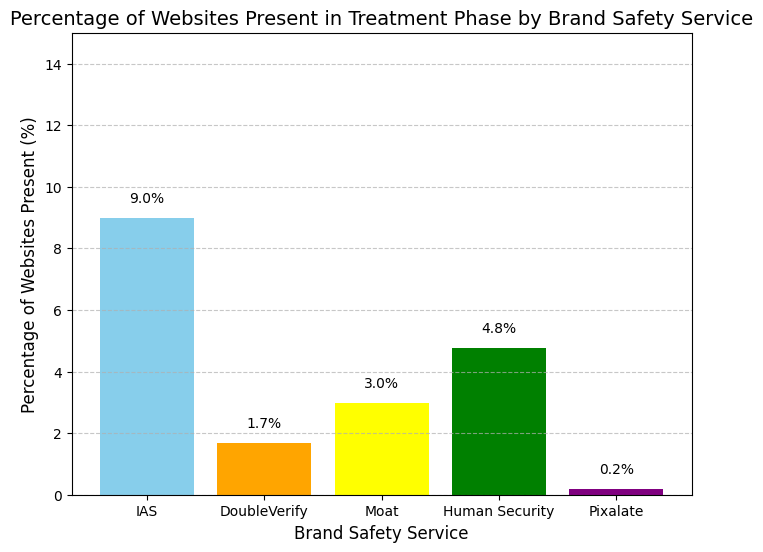

In [28]:
# Filter data for 'Treatment' phase
treatment_data = data[data['Phase'] == 'Treatment']

# Count instances > 0 in each domain column and calculate percentages
percentages = [(treatment_data[domain] > 0).sum() / phase_crawl * 100 for domain in Domain]

# Plot the bar chart
plt.figure(figsize=(8, 6))
plt.bar(Domain, percentages, color=colour_Domain)

# Add labels and title
plt.xlabel('Brand Safety Service', fontsize=12)
plt.ylabel('Percentage of Websites Present (%)', fontsize=12)
plt.title('Percentage of Websites Present in Treatment Phase by Brand Safety Service', fontsize=14)
plt.ylim(0, 15)  # Ensure y-axis is percentage-based
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate the bars with the percentage values
for i, pct in enumerate(percentages):
    plt.text(i, pct+0.5, f"{pct:.1f}%", ha='center', fontsize=10)

plt.show()

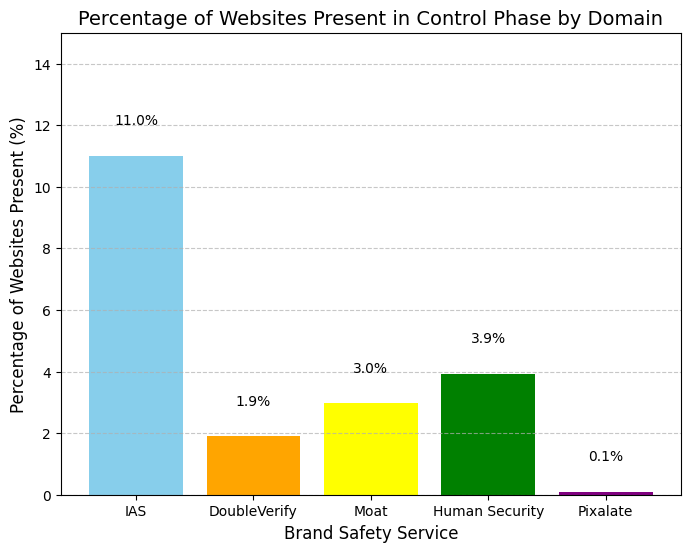

In [26]:
# Filter data for 'Control' phase
control_data = data[data['Phase'] == 'Control']

# Count instances > 0 in each domain column and calculate percentages
percentages = [(control_data[domain] > 0).sum() / phase_crawl * 100 for domain in Domain]

# Plot the bar chart
plt.figure(figsize=(8, 6))
plt.bar(Domain, percentages, color=colour_Domain)

# Add labels and title
plt.xlabel('Brand Safety Service', fontsize=12)
plt.ylabel('Percentage of Websites Present (%)', fontsize=12)
plt.title('Percentage of Websites Present in Control Phase by Domain', fontsize=14)
plt.ylim(0, 15)  # Ensure y-axis is percentage-based
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate the bars with the percentage values
for i, pct in enumerate(percentages):
    plt.text(i, pct + 1, f"{pct:.1f}%", ha='center', fontsize=10)

plt.show()

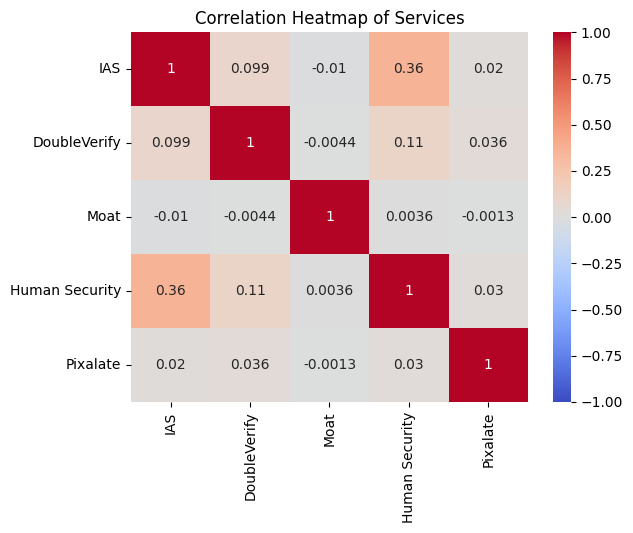

In [30]:
# 4. Correlation Analysis of Services
correlation = data[Domain].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Services')
plt.show()

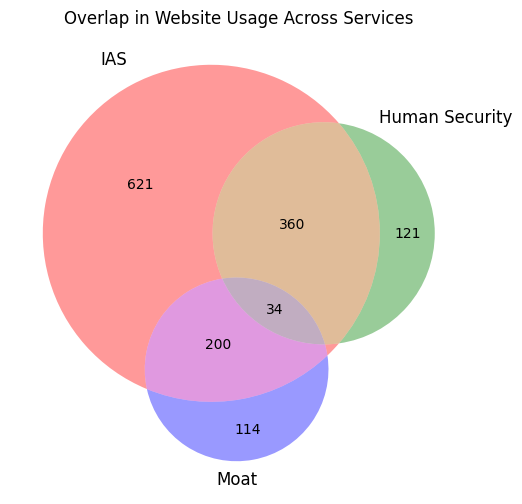

In [38]:
# Example data for 3 services
set1 = set(data[data['IAS'] > 0].index)
set2 = set(data[data['Human Security'] > 0].index)
set3 = set(data[data['Moat'] > 0].index)

# Venn Diagram
plt.figure(figsize=(8, 6))
venn3([set1, set2, set3], ('IAS', 'Human Security', 'Moat'))
plt.title('Overlap in Website Usage Across Services')
plt.show()

C:\Users\ronit\AppData\Local\Temp\ipykernel_9776\3312207244.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  binary_data = phase_data[Domain].applymap(lambda x: 1 if x > 0 else 0)
c:\Users\ronit\AppData\Local\Programs\Python\Python312\Lib\site-packages\upsetplot\plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)
c:\Users\ronit\AppData\Local\Programs\Python\Python312\Lib\site-packages\upsetplot\plotting.py:796: FutureWarning: A valu

<Figure size 1000x600 with 0 Axes>

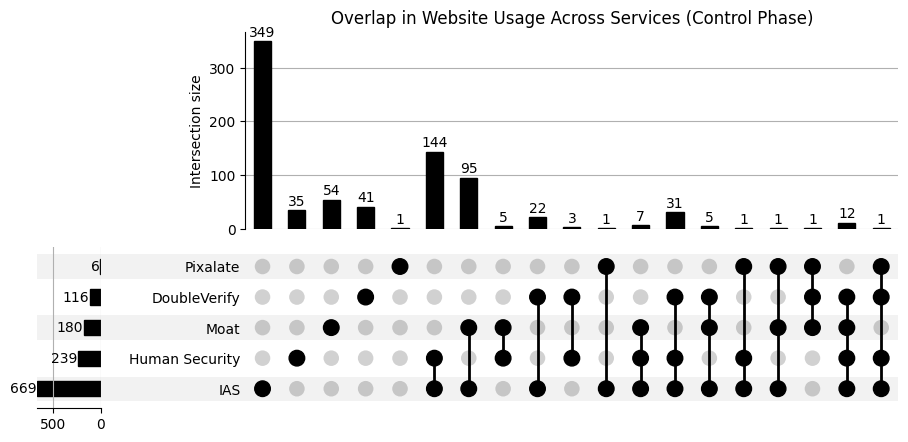

C:\Users\ronit\AppData\Local\Temp\ipykernel_9776\3312207244.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  binary_data = phase_data[Domain].applymap(lambda x: 1 if x > 0 else 0)
c:\Users\ronit\AppData\Local\Programs\Python\Python312\Lib\site-packages\upsetplot\plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)
c:\Users\ronit\AppData\Local\Programs\Python\Python312\Lib\site-packages\upsetplot\plotting.py:796: FutureWarning: A valu

<Figure size 1000x600 with 0 Axes>

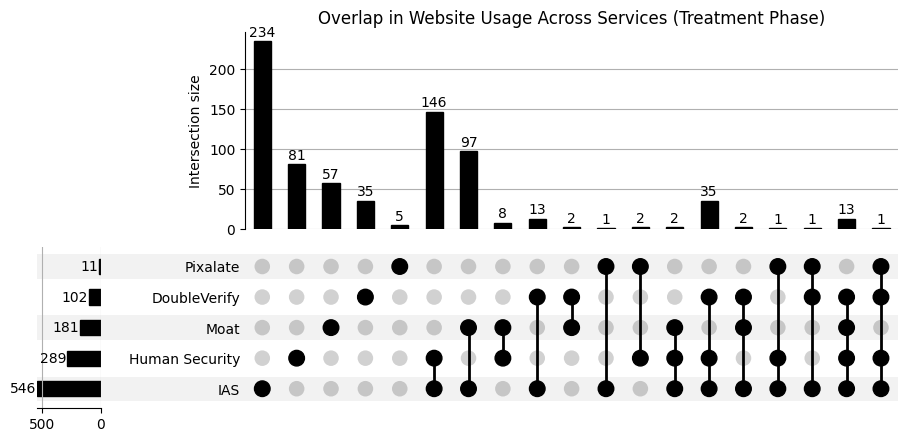

In [54]:
control_data = data[data['Phase'] == 'Control']
treatment_data = data[data['Phase'] == 'Treatment']

def generate_upset_plot(phase_data, title):
    # Create a binary DataFrame to represent service usage (1 for usage, 0 for no usage)
    binary_data = phase_data[Domain].applymap(lambda x: 1 if x > 0 else 0)

    # Remove rows where no service is used (all values are 0)
    binary_data = binary_data[(binary_data.sum(axis=1) > 0)]

    # Convert binary data to multi-index format for UpSetPlot
    binary_data = DataFrame({'count': 1}, index=pd.MultiIndex.from_frame(binary_data))

    # Generate UpSet plot
    plt.figure(figsize=(10, 6))
    upset = UpSet(binary_data, subset_size='count', show_counts=True)
    upset.plot()
    plt.title(title)
    plt.show()

# Generate UpSet plots for Control Phase
generate_upset_plot(control_data, 'Overlap in Website Usage Across Services (Control Phase)')

# Generate UpSet plots for Treatment Phase
generate_upset_plot(treatment_data, 'Overlap in Website Usage Across Services (Treatment Phase)')

In [15]:
# Subdomains data 
subdomains = {
    'IAS': [
        "adsafeprotected.com", "getpublica.com", "iasds01.com", "publica-ctv.com", "publica-project.com", "publica-stream.com"],
    'DoubleVerify': [
        "besafe.global","doubleverify.com","meetrics.com","meetrics.de","meetrics.net","mxcdn.net", "openslate.com", "openslatedata.com", "research.de.com"],
    'Moat': ["moatads.com"],
    'Human Security': [
        "acexedge.com", "adlookr.com", "admathhd.com", "adnxtr.com", "adsrvs.com", "adsximg.com", "adxyield.com", "adzmath.com", "clcktrax.com", "clean.gg", 
        "clean.io", "humansecurity.com", "iaudienc.com", "imgsynd.com", "mrmserve.com", "ninjapd.com", "perimeterx.com", "perimeterx.net", "pkthop.com", "px-cdn.net", 
        "px-client.net", "px-cloud.net", "pxi.pub", "pxltgr.com", "script.ac", "srvmath.com", "tagsrvcs.com", "tpctrust.com", "tworismo.com", "whiteops.com"
    ],
    'Pixalate': [
        "adrta.com", "pixalate.com"
    ]
}

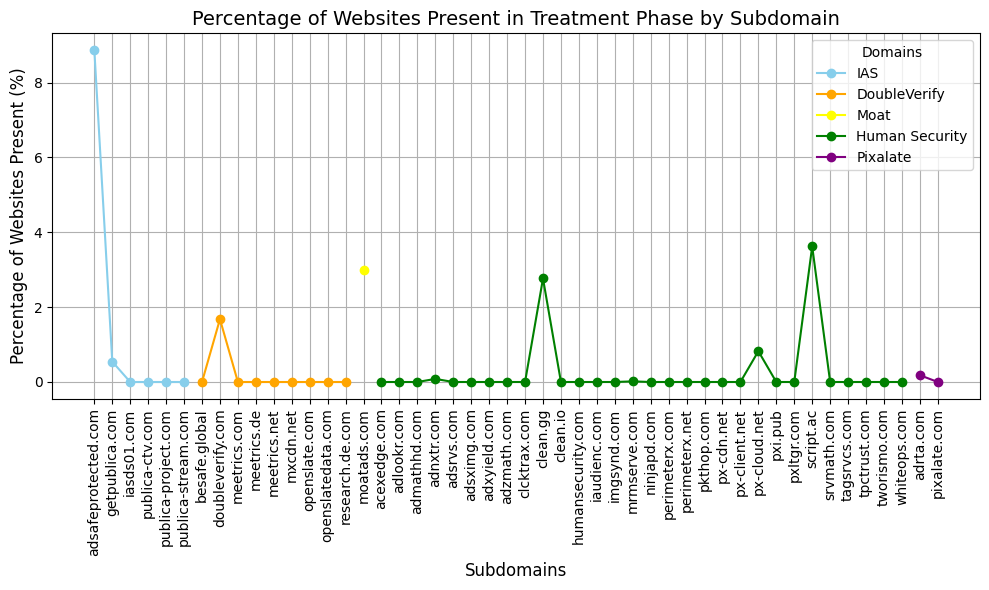

In [24]:
# Filter the data for the 'Treatment' phase
treatment_data1 = untrim_data[untrim_data['Phase'] == 'Treatment']

# Calculate the percentage of websites present for each subdomain
percentages_by_subdomain = {}

# For each domain, calculate the percentage for its subdomains
for domain, subdomain_list in subdomains.items():
    percentages_by_subdomain[domain] = []
    
    for subdomain in subdomain_list:
        # Count instances where the subdomain column has values > 0
        subdomain_present = (treatment_data1[subdomain] > 0).sum()
        
        # Calculate percentage
        percentage = (subdomain_present / (phase_crawl)) * 100  # Total crawls = 82 * 63
        percentages_by_subdomain[domain].append(percentage)

# Plot the line plot
plt.figure(figsize=(10, 6))

# Plot each domain with a single line representing its subdomains
for i, domain in enumerate(Domain):
    plt.plot(subdomains[domain], percentages_by_subdomain[domain], 
             label=domain, color=colour_Domain[i], marker='o', linestyle='-', markersize=6)

# Add labels, title, and grid
plt.xlabel('Subdomains', fontsize=12)
plt.ylabel('Percentage of Websites Present (%)', fontsize=12)
plt.title('Percentage of Websites Present in Treatment Phase by Subdomain', fontsize=14)
plt.legend(title='Domains')
plt.grid(True)

# Rotate x-axis labels to avoid overlap
plt.xticks(rotation=90, ha='center')
plt.tight_layout()  # Adjust layout for readability

# Show the plot
plt.show()

IAS
669
10.790322580645162
546
8.806451612903226
DoubleVerify
116
1.870967741935484
102
1.6451612903225807
Moat
180
2.903225806451613
181
2.9193548387096775
Human Security
239
3.8548387096774195
289
4.661290322580645
Pixalate
6
0.0967741935483871
11
0.1774193548387097


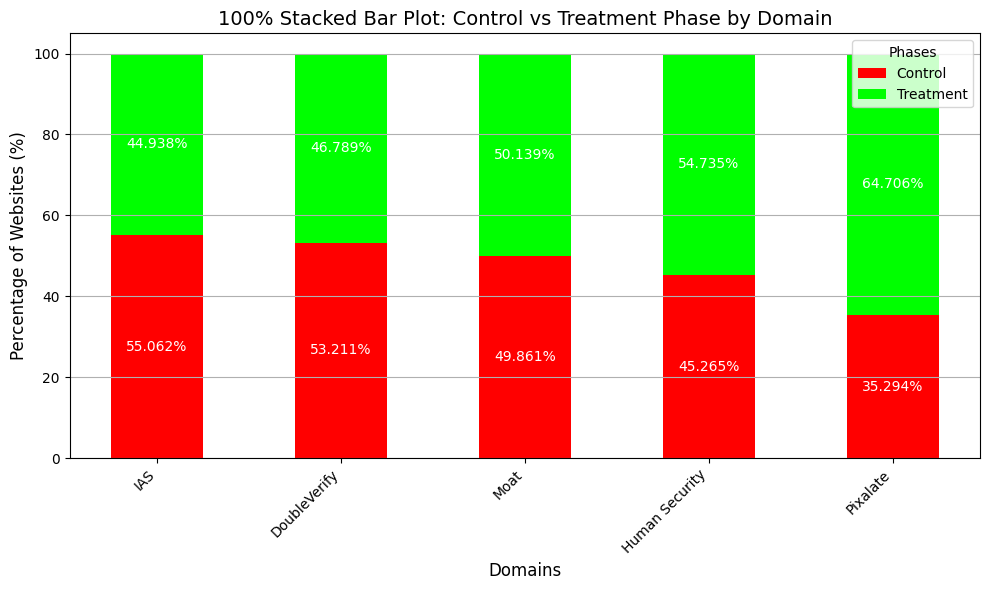

In [61]:
# Filter the data for the 'Control' and 'Treatment' phases
control_data = data[data['Phase'] == 'Control']
treatment_data = data[data['Phase'] == 'Treatment']

# Calculate the percentage of websites present for each domain in both phases
control_percentages = {}
treatment_percentages = {}

for domain in Domain:
    # For each domain, calculate the percentage for its domain in the 'Control' phase
    control_percentages[domain] = []
    treatment_percentages[domain] = []
    # Count instances where the domain column has values > 0
    control_present = (control_data[domain] > 0).sum()
    treatment_present = (treatment_data[domain] > 0).sum()
        
    # Calculate percentage for each phase
    control_percentage = (control_present / len(control_data)) * 100
    treatment_percentage = (treatment_present / len(treatment_data)) * 100
    print(domain)
    print(control_present)
    print(control_percentage)
    print(treatment_present)
    print(treatment_percentage)
    control_percentages[domain].append(control_percentage)
    treatment_percentages[domain].append(treatment_percentage)

# Prepare the data for the stacked bar plot
domains = Domain
control_values = [np.sum(control_percentages[domain]) for domain in domains]
treatment_values = [np.sum(treatment_percentages[domain]) for domain in domains]

# Normalize the values to 100% for stacked bar plot
total_values = np.array(control_values) + np.array(treatment_values)
control_percent_normalized = (np.array(control_values) / total_values) * 100
treatment_percent_normalized = (np.array(treatment_values) / total_values) * 100

# Create the stacked bar plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data
bar_width = 0.5  # Width of the bars
index = np.arange(len(domains))  # X locations for the groups

# Stack the bars for Control and Treatment
bars_control = ax.bar(index, control_percent_normalized, bar_width, label='Control', color=Phase_colour[0])
bars_treatment = ax.bar(index, treatment_percent_normalized, bar_width, bottom=control_percent_normalized, label='Treatment', color=Phase_colour[1])

# Add the percentage values inside the bars
for i, bar in enumerate(bars_control):
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval/2, f'{yval:.3f}%', ha='center', va='center', color='white', fontsize=10)

for i, bar in enumerate(bars_treatment):
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, control_percent_normalized[i] + yval/2, f'{yval:.3f}%', ha='center', va='center', color='white', fontsize=10)

# Add labels, title, and grid
ax.set_xlabel('Domains', fontsize=12)
ax.set_ylabel('Percentage of Websites (%)', fontsize=12)
ax.set_title('100% Stacked Bar Plot: Control vs Treatment Phase by Domain', fontsize=14)
ax.set_xticks(index)
ax.set_xticklabels(domains, rotation=45, ha='right')
ax.legend(title='Phases')

# Add grid and layout adjustments
ax.grid(True, axis='y')
plt.tight_layout()

# Show the plot
plt.show()

adsafeprotected.com
10.774193548387096
668
8.693548387096774
539
getpublica.com
0.3870967741935484
24
0.532258064516129
33
iasds01.com
0.0
0
0.0
0
publica-ctv.com
0.0
0
0.0
0
publica-project.com
0.0
0
0.0
0
publica-stream.com
0.0
0
0.0
0
besafe.global
0.0
0
0.0
0
doubleverify.com
1.870967741935484
116
1.6451612903225807
102
meetrics.com
0.0
0
0.0
0
meetrics.de
0.0
0
0.0
0
meetrics.net
0.0
0
0.0
0
mxcdn.net
0.0
0
0.0
0
openslate.com
0.0
0
0.0
0
openslatedata.com
0.0
0
0.0
0
research.de.com
0.0
0
0.0
0
moatads.com
2.903225806451613
180
2.9193548387096775
181
acexedge.com
0.0
0
0.0
0
adlookr.com
0.0
0
0.0
0
admathhd.com
0.0
0
0.0
0
adnxtr.com
0.016129032258064516
1
0.08064516129032258
5
adsrvs.com
0.0
0
0.0
0
adsximg.com
0.0
0
0.0
0
adxyield.com
0.0
0
0.0
0
adzmath.com
0.0
0
0.0
0
clcktrax.com
0.0
0
0.0
0
clean.gg
2.693548387096774
167
2.7096774193548385
168
clean.io
0.0
0
0.0
0
humansecurity.com
0.0
0
0.0
0
iaudienc.com
0.0
0
0.0
0
imgsynd.com
0.0
0
0.0
0
mrmserve.com
0.0
0
0.01612903225

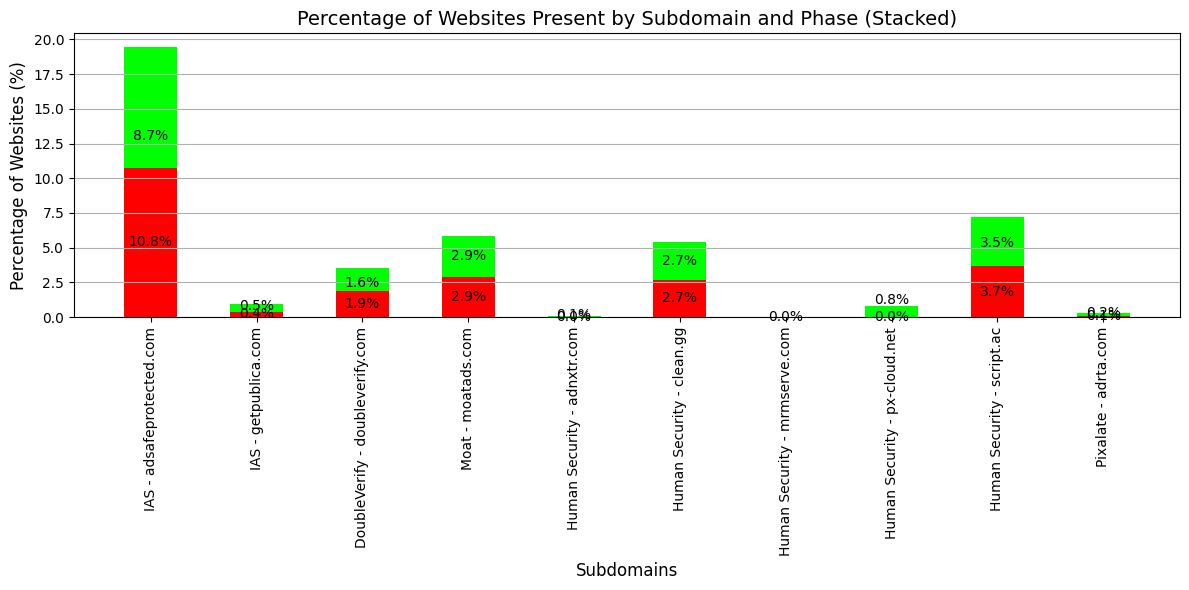

In [60]:
# Filter the data for the 'Control' and 'Treatment' phases
control_data = untrim_data[untrim_data['Phase'] == 'Control']
treatment_data = untrim_data[untrim_data['Phase'] == 'Treatment']

# Calculate the percentage of websites present for each subdomain in both phases
control_percentages = {}
treatment_percentages = {}

for domain, subdomain_list in subdomains.items():
    control_percentages[domain] = []
    treatment_percentages[domain] = []
    
    for subdomain in subdomain_list:
        # Count instances where the subdomain column has values > 0
        control_present = (control_data[subdomain] > 0).sum()
        treatment_present = (treatment_data[subdomain] > 0).sum()
        
        # Calculate percentage for each phase
        control_percentage = (control_present / len(control_data)) * 100
        treatment_percentage = (treatment_present / len(treatment_data)) * 100
        print(subdomain)
        print(control_percentage)
        print(control_present)
        print(treatment_percentage)
        print(treatment_present)
        control_percentages[domain].append(control_percentage)
        treatment_percentages[domain].append(treatment_percentage)

# Prepare data for plotting
subdomain_names = []
control_values = []
treatment_values = []

# Collect subdomain names and corresponding percentages for plotting
for domain, subdomain_list in subdomains.items():
    for subdomain, control_percentage, treatment_percentage in zip(subdomain_list, control_percentages[domain], treatment_percentages[domain]):
        if control_percentage > 0 or treatment_percentage > 0:  # Only include subdomains with > 0% in either phase
            subdomain_names.append(f'{domain} - {subdomain}')
            control_values.append(control_percentage)
            treatment_values.append(treatment_percentage)

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Bar width for subdomains
bar_width = 0.5

# X locations for the subdomains
index = np.arange(len(subdomain_names))

# Stack the bars for Control and Treatment phases
bars_control = ax.bar(index, control_values, bar_width, label='Control', color=Phase_colour[0])
bars_treatment = ax.bar(index, treatment_values, bar_width, bottom=control_values, label='Treatment', color=Phase_colour[1])

# Add percentage labels inside the bars
for bar in bars_control:
    yval = bar.get_height()
    if yval > 0:  # Only display label if value > 0
        ax.text(bar.get_x() + bar.get_width()/2, yval/2, f'{yval:.1f}%', ha='center', va='center', color='black', fontsize=10)

for bar in bars_treatment:
    yval = bar.get_height()
    if yval > 0:  # Only display label if value > 0
        ax.text(bar.get_x() + bar.get_width()/2, yval/2 + bar.get_height(), f'{yval:.1f}%', ha='center', va='center', color='black', fontsize=10)

# Add labels, title, and grid
ax.set_xlabel('Subdomains', fontsize=12)
ax.set_ylabel('Percentage of Websites (%)', fontsize=12)
ax.set_title('Percentage of Websites Present by Subdomain and Phase (Stacked)', fontsize=14)
ax.set_xticks(index)
ax.set_xticklabels(subdomain_names, rotation=90, ha='center')

# Add grid and layout adjustments
ax.grid(True, axis='y')
plt.tight_layout()

# Show the plot
plt.show()

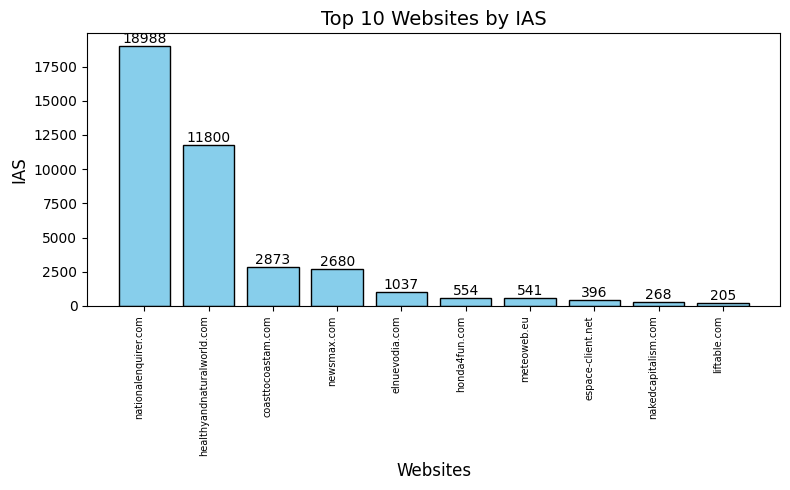

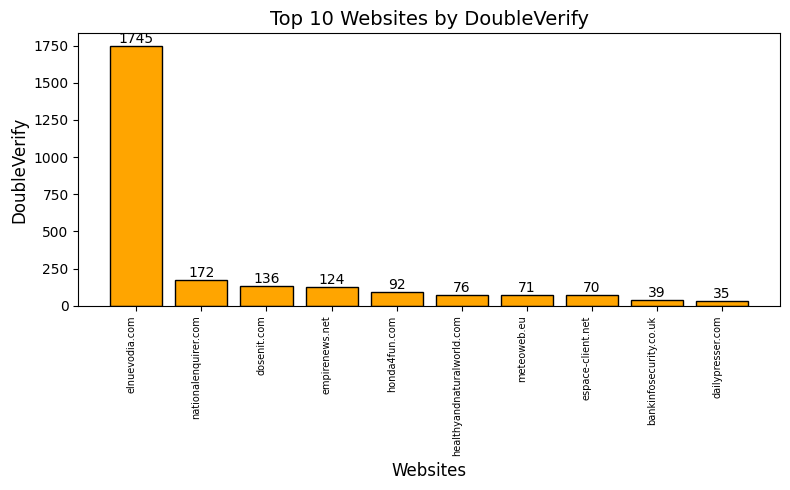

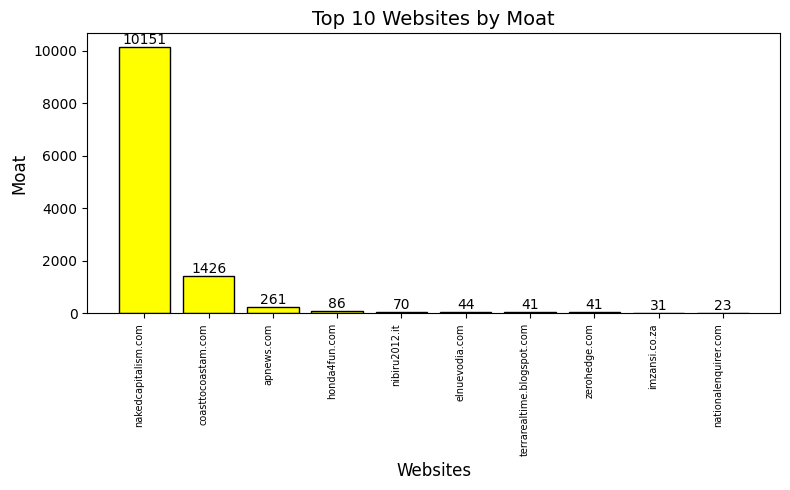

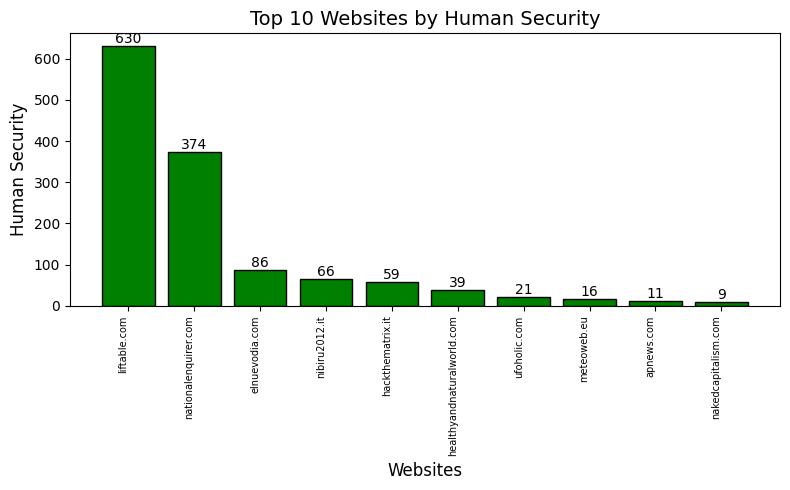

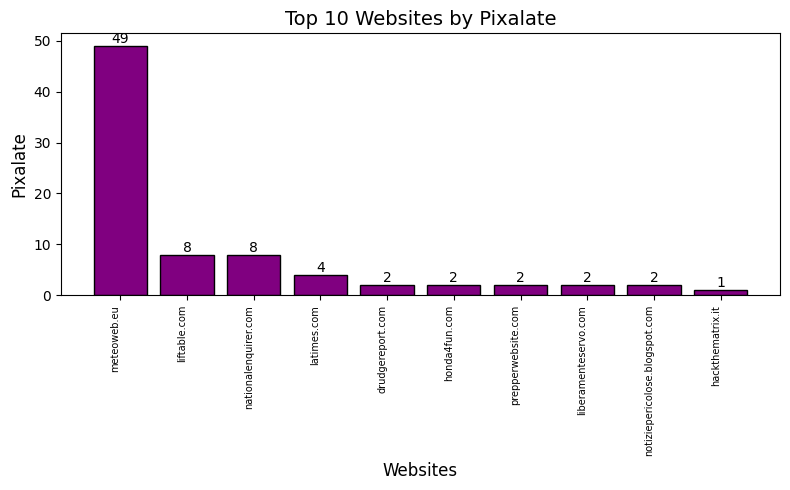

In [19]:
# Plot the data
domain_summary = data.groupby('Website')[['IAS','DoubleVerify','Moat','Human Security','Pixalate']].sum()

for i in Domain:
    top_websites = domain_summary[i].sort_values(ascending=False).head(10)
    
    plt.figure(figsize=(8, 5))
    
    # Map the colors using domain_colour for each 
    if i == 'IAS':
        colors = 'skyblue'
    if i == 'DoubleVerify':
        colors = 'orange'
    if i == 'Moat':
        colors = 'yellow'
    if i == 'Human Security':
        colors = 'green'
    if i == 'Pixalate':
        colors = 'purple'

    # Create the bar plot with mapped colors
    bars = plt.bar(top_websites.index, top_websites, color=colors, edgecolor='black')
    
    # Add the count on top of each bar
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.0f}', ha='center', va='bottom', fontsize=10, color='black')
    
    # Add titles and labels
    plt.title(f"Top 10 Websites by {i}", fontsize=14)
    plt.ylabel(i, fontsize=12)
    plt.xlabel("Websites", fontsize=12)
    plt.xticks(rotation=90, ha='right', fontsize=7)
    plt.tight_layout()
    plt.show()

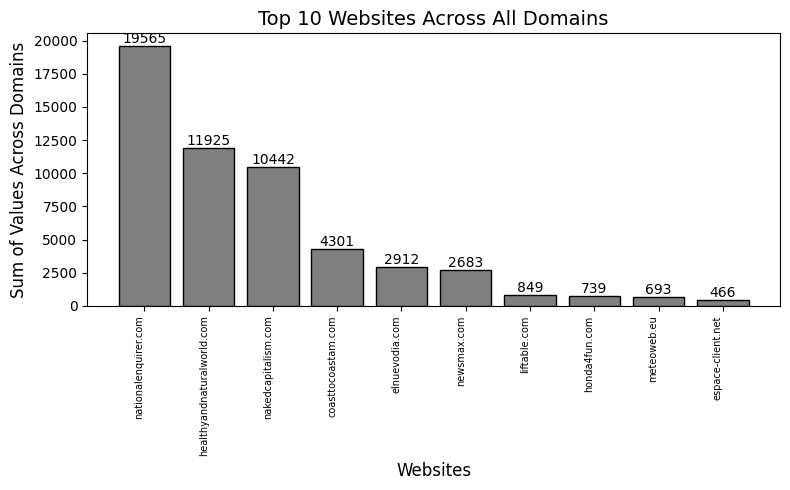

In [20]:
# Combine all domains to create a 6th chart for top 10 websites across all domains
combined_top_websites = domain_summary.sum(axis=1).sort_values(ascending=False).head(10)

# Plot the combined top 10 websites
plt.figure(figsize=(8, 5))
bars_combined = plt.bar(combined_top_websites.index, combined_top_websites, color='gray', edgecolor='black')

# Add the count on top of each bar
for bar in bars_combined:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.0f}', ha='center', va='bottom', fontsize=10, color='black')

# Add titles and labels for the combined chart
plt.title("Top 10 Websites Across All Domains", fontsize=14)
plt.ylabel("Sum of Values Across Domains", fontsize=12)
plt.xlabel("Websites", fontsize=12)
plt.xticks(rotation=90, ha='right', fontsize=7)
plt.tight_layout()
plt.show()